The purpose is to use regression to quantify the relationship between `price` and `reviews_per_month` to identify optimal pricing ranges for various `room_type` and `neighbourhood` segments
Dataset: https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data?select=AB_US_2023.csv

Get the data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS, add_constant

In [16]:
# Read the Airbnb listing data
listing_df = pd.read_csv('/Users/zacw/Downloads/AB_US_2023.csv')

/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_2463/3819902202.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  listing_df = pd.read_csv('/Users/zacw/Downloads/AB_US_2023.csv')


In [17]:
listing_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco
5,10537,Elegant & Cozy w/City views. Private room: Purple,36752,Teresa,NaN,Bayview,37.71750,-122.39698,Private room,95,1,19,2023-01-28,0.12,2,365,1,San Francisco
6,142177,"Stylish, Spacious and Quiet Flat!",656263,Noreen,NaN,Outer Richmond,37.78440,-122.47932,Entire home/apt,259,5,234,2023-02-17,1.69,1,32,13,San Francisco
7,490931,"Mission's ""La Lengua""",1269188,Maureen,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,80,2022-11-26,0.74,1,331,1,San Francisco
8,10578,Classic Nob Hill Studio - Roof Deck,37049,Andrew,NaN,Nob Hill,37.79249,-122.41499,Entire home/apt,79,30,18,2015-05-17,0.13,1,230,0,San Francisco
9,12041,Sunny/Sunset view room UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76901,-122.44701,Private room,65,32,7,2022-06-11,0.05,13,365,1,San Francisco


In [18]:
# Get column names as a list
column_names = listing_df.columns.tolist()

# Display the list of column names
print(column_names)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'city']


In [19]:
print(listing_df.info())
print(listing_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [20]:
# Inspect the dataset for missing or invalid values
# Check for null values in price and reviews_per_month
print(listing_df.info())
print(listing_df.describe())
print(listing_df[['price', 'reviews_per_month']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [21]:
# Data cleaning: remove rows with null or zero values in price or reviews_per_month
data = listing_df.dropna(subset=['price', 'reviews_per_month'])
data = listing_df[listing_df['price'] > 0]

In [22]:
#Handle outliers (e.g., listings with unusually high prices)
data = data[data['price'] < data['price'].quantile(0.95)]  # Remove top 5% of prices

Exploratory Data Analysis (EDA)

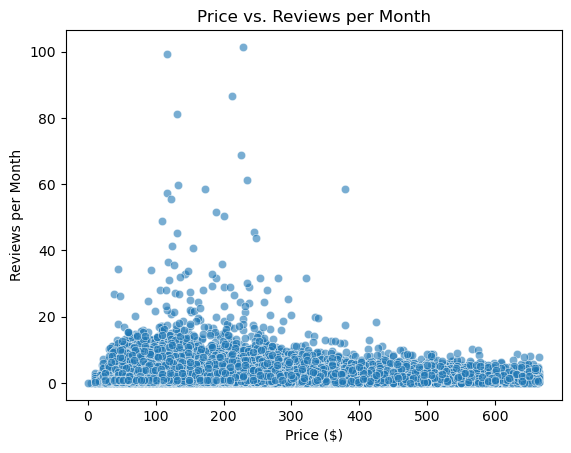

In [23]:
# Visualize the relationship between price and reviews_per_month

sns.scatterplot(x='price', y='reviews_per_month', data=data, alpha=0.6)
plt.title('Price vs. Reviews per Month')
plt.xlabel('Price ($)')
plt.ylabel('Reviews per Month')
plt.show()

Check the distributions of price and reviews_per_month

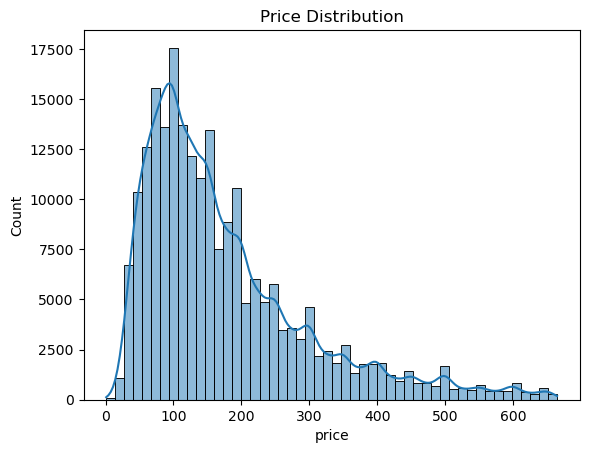

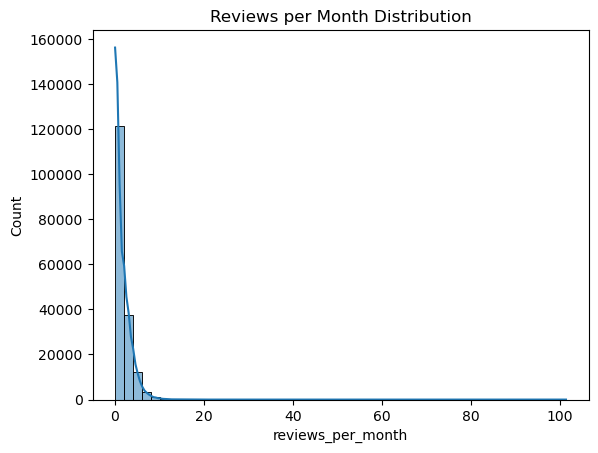

In [24]:
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

sns.histplot(data['reviews_per_month'], bins=50, kde=True)
plt.title('Reviews per Month Distribution')
plt.show()

Perform Regression Analysis

In [ ]:
# Define Segments
# Segment the data by room_type or neighbourhood

In [31]:
room_type_data = data[data['room_type'] == 'Entire home/apt']

In [32]:
# Prepare Data for Regression
# Add a constant column for regression intercept

In [33]:
room_type_data['log_price'] = np.log(room_type_data['price'])  # Optional: log-transform price
room_type_data['log_reviews'] = np.log(room_type_data['reviews_per_month'])  # Optional
X = add_constant(room_type_data['price'])
y = room_type_data['reviews_per_month']

/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_2463/995666429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room_type_data['log_price'] = np.log(room_type_data['price'])  # Optional: log-transform price
/var/folders/fl/f9fhk9c12yz_6547t799bv1m0000gn/T/ipykernel_2463/995666429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  room_type_data['log_reviews'] = np.log(room_type_data['reviews_per_month'])  # Optional


In [34]:
# Run Regression
# Fit the model

model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 25 Dec 2024   Prob (F-statistic):                nan
Time:                        18:45:38   Log-Likelihood:                    nan
No. Observations:              159355   AIC:                               nan
Df Residuals:                  159353   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

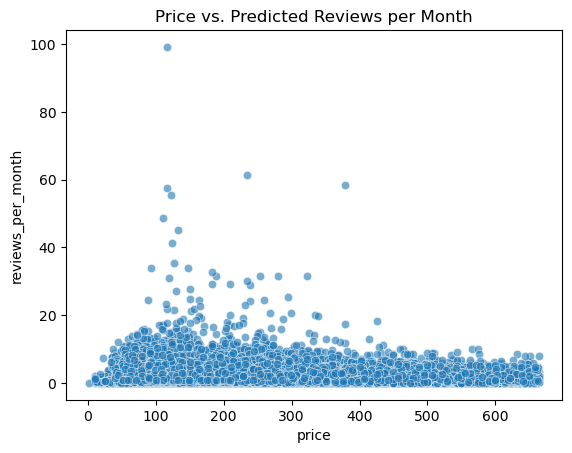

In [35]:
# Identify Optimal Pricing Ranges
# Use the regression equation to predict reviews_per_month for different price points.
# Plot a graph to visualize how reviews_per_month changes with price

predicted_reviews = model.predict(X)
plt.plot(room_type_data['price'], predicted_reviews, color='red')
sns.scatterplot(x='price', y='reviews_per_month', data=room_type_data, alpha=0.6)
plt.title('Price vs. Predicted Reviews per Month')
plt.show()